In [64]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import iqr

In [65]:
# Load heart data set into pandas
heart_df = pd.read_csv("data/heart_failure_clinical_records_dataset.csv")
heart_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [66]:
heart_df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [67]:
heart_df["DEATH_EVENT"].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

In [19]:
heart_df["high_blood_pressure"].value_counts()

high_blood_pressure
0    194
1    105
Name: count, dtype: int64

In [50]:
print(heart_df['high_blood_pressure'].isnull().sum()) 

0


In [51]:
print(heart_df['high_blood_pressure'].head())

0    1
1    0
2    0
3    0
4    0
Name: high_blood_pressure, dtype: int64


In [39]:
high_blood_pressure = heart_df[(heart_df["high_blood_pressure"]==1) & (heart_df["DEATH_EVENT"]==1)]
num_blood_pressure = len(high_blood_pressure)
print(f"The number of high blood Pressure that had a death event: {num_blood_pressure}")

The number of high blood Pressure that had a death event: 39


In [40]:
nor_blood_pressure = heart_df[(heart_df["high_blood_pressure"]== 0) & (heart_df["DEATH_EVENT"]==1)]
num_nor_blood_pressure = len(nor_blood_pressure)
print(f"The number of normal blood Pressure that had a death event: {num_nor_blood_pressure}")

The number of normal blood Pressure that had a death event: 57


In [54]:
#Count total blood pressure and high boold pressure 
blood_pressure_counts = heart_df['high_blood_pressure'].value_counts().rename_axis('High Blood Pressure').reset_index(name='total_blood_pressure')
# print(blood_pressure_counts)

#Count smoke and non-smoke with death events
death_event_counts = heart_df[heart_df["DEATH_EVENT"]==1]["high_blood_pressure"].value_counts().rename_axis('High Blood Pressure').reset_index(name='Death High Blood Pressure')
# blood_pressure_event_counts

   High Blood Pressure  total_blood_pressure
0                    0                   194
1                    1                   105


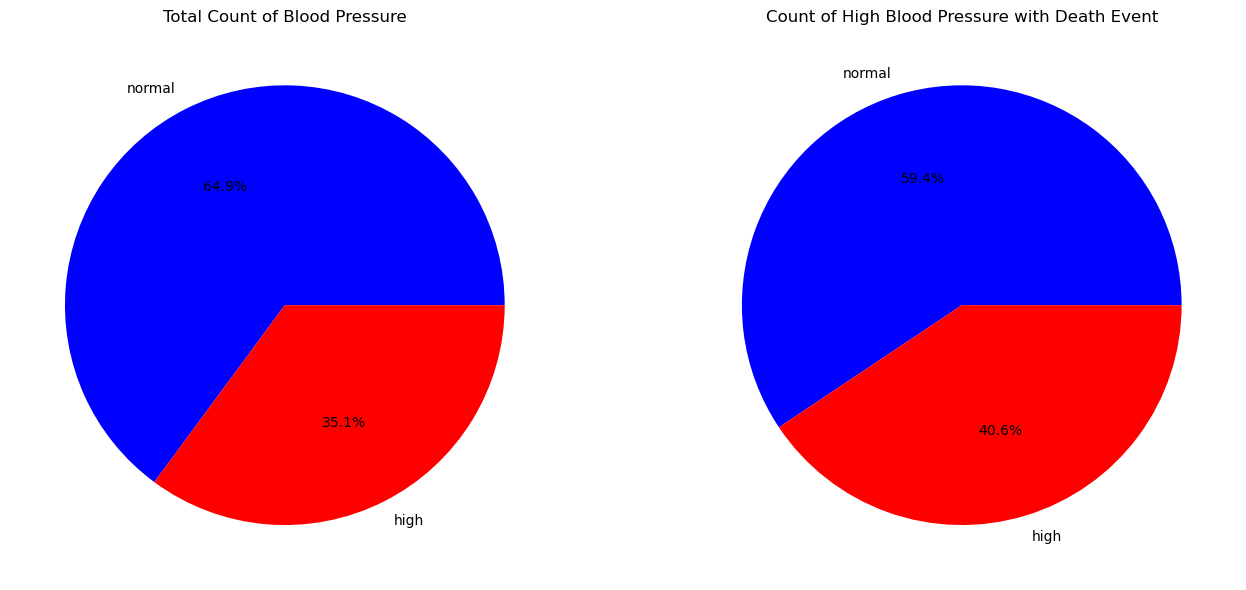

In [97]:
# Prepare pie chart data
blood_pressure_pie_data = blood_pressure_counts.set_index('High Blood Pressure')['total_blood_pressure']
death_event_pie_data = death_event_counts.set_index('High Blood Pressure')['Death High Blood Pressure']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Pie chart for blood pressure counts
axes[0].pie(blood_pressure_pie_data, labels=blood_pressure_pie_data.index, autopct='%1.1f%%', colors=['blue', 'red'])
axes[0].set_title('Total Count of Blood Pressure')

# Pie chart for death event counts
axes[1].pie(death_event_pie_data, labels=death_event_pie_data.index, autopct='%1.1f%%', colors=['blue', 'red'])
axes[1].set_title('Count of High Blood Pressure with Death Event')

plt.tight_layout()
plt.show()

In [80]:
#View outlier determination for age column
X = "age"
print(X+":")
mean1 = heart_df[X].quantile(q=0.25)
mean2 = heart_df[X].quantile(q=0.75)
mean3 = mean2 - mean1
topnum = mean2 + 1.5*mean3
lowernum = mean2 - 1.5*mean3
print("The normal Value:" , topnum, lowernum)
print("Presence of values out of normal range:", any(heart_df[X] > topnum))
print("Presence of values below the normal range:", any(heart_df[X] < lowernum))

age:
The normal Value: 98.5 41.5
Presence of values out of normal range: False
Presence of values below the normal range: True


In [92]:
# heart disease of age range
age_df = pd.DataFrame()

age_df["age_range"] = pd.cut(x=heart_df["age"],
                             bins=[0, 30, 40, 50 , 60, 70, 80, 90, 100],
                             include_lowest=True,
                             right=False,
                             labels=['0-29', '30-39', '40-49', '50-59', '60-69', '70-79','80-89', '90+'])

age_df = pd.concat([age_df["age_range"], heart_df["DEATH_EVENT"]], axis=1)
age_df.head()

at = age_df.groupby(["age_range", "DEATH_EVENT"]).agg({"DEATH_EVENT": "count"})
at.rename(columns={"DEATH_EVENT": "Amount"}, inplace=True)
at = at.reset_index()
# print(at)



C:\Users\Yiling C\AppData\Local\Temp\ipykernel_216364\3538522978.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  at = age_df.groupby(["age_range", "DEATH_EVENT"]).agg({"DEATH_EVENT": "count"})


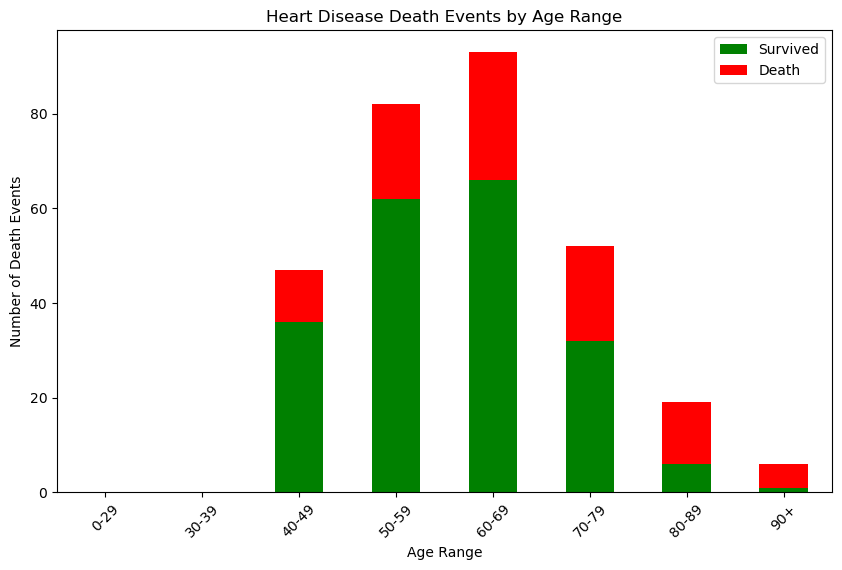

In [93]:
# Pivot the DataFrame for easier plotting
pivot_df = at.pivot(index="age_range", columns="DEATH_EVENT", values="Amount")
pivot_df = pivot_df.fillna(0)  # Fill NaN values with 0

# Plotting
pivot_df.plot(kind="bar", stacked=True, figsize=(10, 6), color=['green', 'red'])
plt.title("Heart Disease Death Events by Age Range")
plt.xlabel("Age Range")
plt.ylabel("Number of Death Events")
plt.xticks(rotation=45)
plt.legend(["Survived", "Death"])
plt.show()

In [99]:
# Age group
age_bins = [0, 30, 40, 50 , 60, 70, 80, 90, 100]
age_labels = ['0-29', '30-39', '40-49', '50-59', '60-69', '70-79','80-89', '90+']
heart_df['age_group'] = pd.cut(heart_df['age'], bins=age_bins, labels=age_labels, right=False)
heart_df.head()

# Smoking patients that encountered a death event by age group
hypertension_death_age_group = heart_df[(heart_df["high_blood_pressure"] == 1) & (heart_df["DEATH_EVENT"] == 1)].groupby('age_group', observed=False).size().reset_index(name='hypertension_death_count')
hypertension_death_age_group

# Non Smoking patients that encountered a death event by age group
nor_bloodPerssure_death_age_group = heart_df[(heart_df["high_blood_pressure"] == 1) & (heart_df["DEATH_EVENT"] == 0)].groupby('age_group', observed=False).size().reset_index(name='normal_blood_pressure_count')
nor_bloodPerssure_death_age_group

#merge smoke and non-smoke age group
death_age_group = hypertension_death_age_group.merge(nor_bloodPerssure_death_age_group, on="age_group", how='outer')
death_age_group

,age_group,hypertension_death_count,normal_blood_pressure_count
0,0-29,0,0
1,30-39,0,0
2,40-49,5,9
3,50-59,8,18
4,60-69,6,23
5,70-79,13,16
6,80-89,4,0
7,90+,3,0


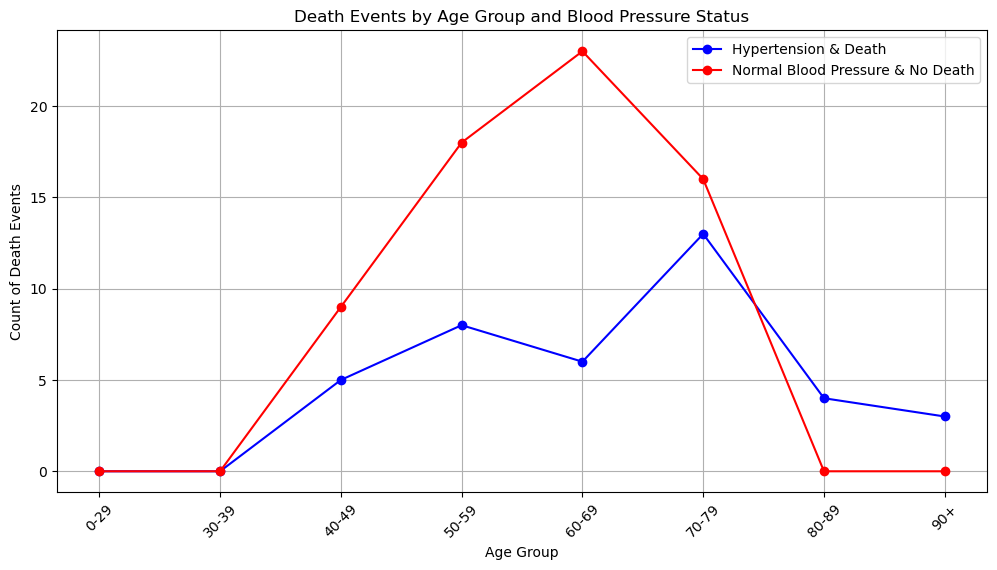

In [102]:
# Plotting the line graph
plt.figure(figsize=(12, 6))

# Line for patients with hypertension and death event
plt.plot(death_age_group['age_group'], death_age_group['hypertension_death_count'], marker='o', linestyle='-', color='blue', label='Hypertension & Death')

# Line for patients with hypertension and no death event
plt.plot(death_age_group['age_group'], death_age_group['normal_blood_pressure_count'], marker='o', linestyle='-', color='red', label='Normal Blood Pressure & No Death')

plt.title("Death Events by Age Group and Blood Pressure Status")
plt.xlabel("Age Group")
plt.ylabel("Count of Death Events")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.show()